In [6]:
import pandas as pd

In [7]:
df = pd.read_csv("Titanic.csv")

In [8]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [9]:
df.loc[99]

PassengerId                  100
Survived                       0
Pclass                         2
Name           Kantor, Mr. Sinai
Sex                         male
Age                         34.0
SibSp                          1
Parch                          0
Ticket                    244367
Fare                        26.0
Cabin                        NaN
Embarked                       S
Name: 99, dtype: object

In [10]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
num_males = (df['Sex'] == 'male').sum()

In [12]:
print(f'Number of males: {num_males}')

Number of males: 577


In [13]:
df.loc[5, 'Age'] = 28

In [14]:
print(df.loc[5])

PassengerId                   6
Survived                      0
Pclass                        3
Name           Moran, Mr. James
Sex                        male
Age                        28.0
SibSp                         0
Parch                         0
Ticket                   330877
Fare                     8.4583
Cabin                       NaN
Embarked                      Q
Name: 5, dtype: object


In [15]:
num_males = (df['Sex'] == 'male').sum()

In [16]:
total_entries = len(df)

In [17]:
percentage_males = (num_males / total_entries) * 100

In [18]:
print(f'Percentage of males: {percentage_males:.2f}%')

Percentage of males: 64.76%


In [19]:
count = 0
for person in df["Age"]:
    if person > 18:
        count = count +1
count

576

In [20]:
count = (df['Age'] > 18).sum()

In [21]:
print(count)

576


In [22]:
count = 0 
for person in df ["Sex"]:
    if person == "male":
        count = count + 1 
        
count = (count / len(df)) * 100
count

64.75869809203144

In [23]:
embark_counts = (df['Embarked']).value_counts()

In [24]:
embark_percentages = (embark_counts / len(df)) * 100

In [25]:
print(embark_percentages)

S    72.278339
C    18.855219
Q     8.641975
Name: Embarked, dtype: float64


In [26]:
frequency_table = df['Embarked'].value_counts()

In [27]:
print(frequency_table)

S    644
C    168
Q     77
Name: Embarked, dtype: int64


In [28]:
total_tickets_sold = frequency_table.sum()

In [29]:
print(f'Total tickets sold on Titanic\'s maiden voyage: {total_tickets_sold}')

Total tickets sold on Titanic's maiden voyage: 889


In [30]:
port_counts = df['Embarked'].value_counts()

In [31]:
relative_frequencies = port_counts / port_counts.sum()

In [32]:
percentages = relative_frequencies * 100

In [33]:
print(percentages)

S    72.440945
C    18.897638
Q     8.661417
Name: Embarked, dtype: float64


In [34]:
sample_528 = df.iloc[527]

In [35]:
print(sample_528)

PassengerId                   528
Survived                        0
Pclass                          1
Name           Farthing, Mr. John
Sex                          male
Age                           NaN
SibSp                           0
Parch                           0
Ticket                   PC 17483
Fare                     221.7792
Cabin                         C95
Embarked                        S
Name: 527, dtype: object


In [36]:
df[df['PassengerId'] == 528]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
527,528,0,1,"Farthing, Mr. John",male,NaN,0,0,PC 17483,221.7792,C95,S


In [37]:
print(df.loc[df['Name'].str.contains("Fannie", case=False, na=False)])

     PassengerId  Survived  Pclass                           Name     Sex  \
706          707         1       2  Kelly, Mrs. Florence "Fannie"  female   

      Age  SibSp  Parch  Ticket  Fare Cabin Embarked  
706  45.0      0      0  223596  13.5   NaN        S  


In [38]:
idx = 0
for person in df["Name"]:
    if "Fannie" in person:
        break
    idx = +1
    df.loc[idx]

In [39]:
contingency_table = pd.crosstab(df['Sex'], df['Survived'], margins=True)

print(contingency_table)

Survived    0    1  All
Sex                    
female     81  233  314
male      468  109  577
All       549  342  891


In [40]:
maleSurvive = 0
femaleSurvive = 0
maleDied = 0
femaledDied = 0
for idx in range(len(df)):
    if df.loc[idx]["Sex"] == "male" and df.loc[idx]["Survived"] == 0:
        maleDied += 1
    elif df.loc[idx]["Sex"] == "male" and df.loc[idx]["Survived"] == 1:
        maleSurvive += 1
    if df.loc[idx]["Sex"] == "female" and df.loc[idx]["Survived"] == 0:
        femaleDied += 1
    elif df.loc[idx]["Sex"] == "female" and df.loc[idx]["Survived"] == 1:
        femaleSurvive += 1
conTable = pd.DataFrame({
        "Male": [maleSurvive, maleDied],
        "Female": [femaleSurvive, femaleDied]
    })
conTable. index = ["Survived" , "Died"]
print(df.loc[idx]["Sex"], df.loc[idx]["Survived"])

NameError: name 'femaleDied' is not defined

In [41]:
df['Age Group'] = df['Age'].apply(lambda x: 'Under 18' if x < 18 else 'Over 18')

In [49]:
childSurvive = 0
childDied = 0
adultSurvive = 0
adultDied = 0
elderSurvive = 0
elderDied = 0 
for idx in range (len(df)):
    if df.loc[idx]["Age"] < 18 and df.loc[idx]["Survived"] == 1:
        childSurvive += 1
    elif df.loc[idx]["Age"] < 18 and df.loc[idx]["Survived"] == 0:
        childDied += 1
    elif df.loc[idx]["Age"] >= 18 and df.loc[idx]["Age"] < 60 and df.loc[idx]["Survived"] == 0:
        adultSurvive += 1
    elif df.loc[idx]["Age"] >= 18 and df.loc[idx]["Age"] < 60 and df.loc[idx]["Survived"] == 1:
        adultDied += 1
  
    elif df.loc[idx]["Age"] >= 60 and df.loc[idx]["Age"] < 60 and df.loc[idx]["Survived"] == 0:
        elderlySurvive += 1
    elif df.loc[idx]["Age"] >= 60 and df.loc[idx]["Age"] < 60 and df.loc[idx]["Survived"] == 1:
        elderlyDied += 1

In [43]:
print(df['Embarked'].value_counts())
print(df[['Embarked', 'Survived']].head())

S    644
C    168
Q     77
Name: Embarked, dtype: int64
  Embarked  Survived
0        S         0
1        C         1
2        S         1
3        S         1
4        S         0


In [44]:
survival_rates = df.groupby('Embarked')['Survived'].mean()
print(survival_rates)

Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64


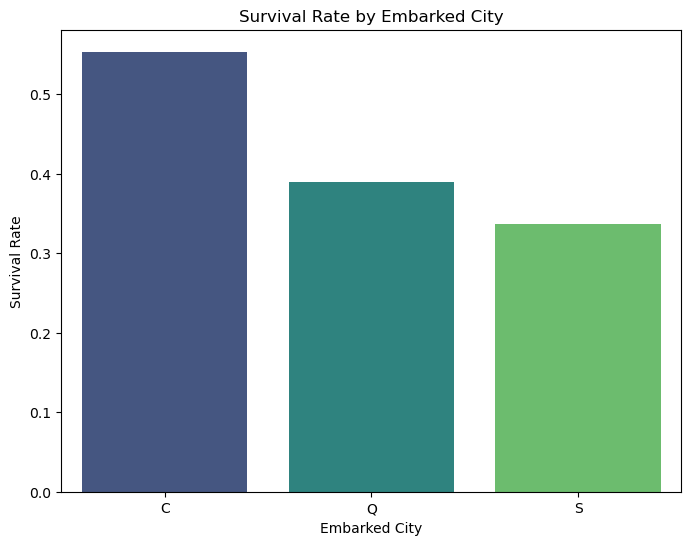

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=survival_rates.index, y=survival_rates.values, palette='viridis')
plt.xlabel('Embarked City')
plt.ylabel('Survival Rate')
plt.title('Survival Rate by Embarked City')
plt.show()

In [46]:
contingency_table = pd.crosstab(df['Embarked'], df['Survived'])
print(contingency_table)

Survived    0    1
Embarked          
C          75   93
Q          47   30
S         427  217


In [47]:
relative_contingency_table = contingency_table.div(contingency_table.sum(axis=1), axis=0)
print(relative_contingency_table)

Survived         0         1
Embarked                    
C         0.446429  0.553571
Q         0.610390  0.389610
S         0.663043  0.336957


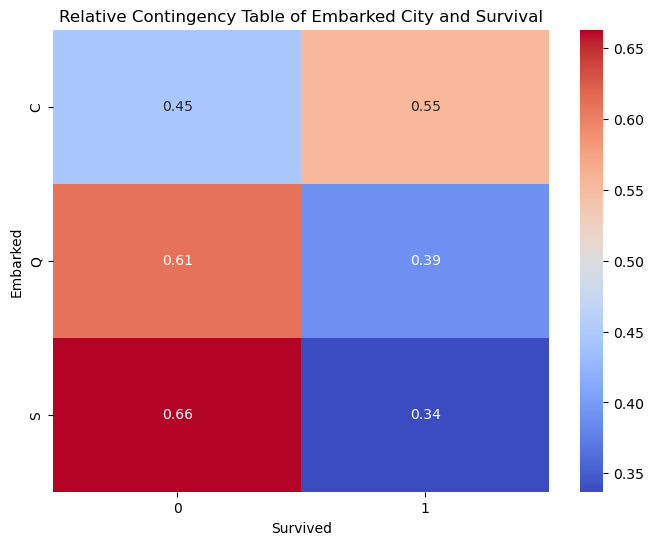

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(relative_contingency_table, annot=True, cmap='coolwarm', fmt='.2f')
plt.xlabel('Survived')
plt.ylabel('Embarked')
plt.title('Relative Contingency Table of Embarked City and Survival')
plt.show()